In [1]:
import keras
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'

import matplotlib.pyplot as plt

from PIL import Image

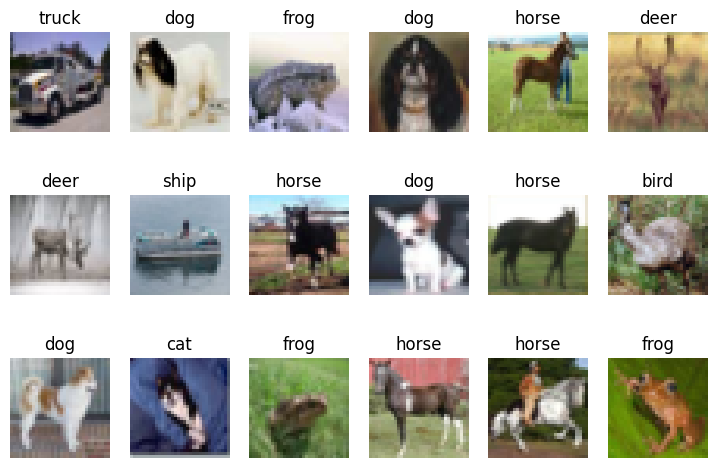

Single image size: 32 x 32
Number of channels: 3


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

cifar10_classes = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

w, h, c = X_train[0].shape
print(f"Single image size: {w} x {h}\nNumber of channels: {c}")

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
max_val = X_train.max()
X_train_norm = X_train / max_val
X_test_norm = X_test / max_val

In [8]:
model = Sequential([
    Input((w, h, c)),
    Conv2D(filters=16, kernel_size=3, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),
    Dense(128, activation='elu'),
    Dropout(0.5),
    Dense(64, activation='elu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()
BATCH_SIZE = 128
EPOCHS = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_norm, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_norm, y_test_cat))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,034 (2.57 MB)

 Trainable params: 673,034 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.2926 - loss: 1.9343 - val_accuracy: 0.5205 - val_loss: 1.3427
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5112 - loss: 1.3835 - val_accuracy: 0.6159 - val_loss: 1.0919
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.5630 - loss: 1.2390 - val_accuracy: 0.6420 - val_loss: 1.0526
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.5957 - loss: 1.1670 - val_accuracy: 0.6713 - val_loss: 0.9363
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.6200 - loss: 1.1035 - val_accuracy: 0.6866 - val_loss: 0.9042
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.6362 - loss: 1.0625 - val_accuracy: 0.7050 - val_loss: 0.8496
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.6533 - loss: 1.0078 - val_accuracy: 0.7074 - val_loss: 0.8357
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6716 - loss: 0.9781 - 

In [9]:
loss_history = pd.DataFrame({
    'train': history.history['loss'],
    'test': history.history['val_loss']
})
px.line(loss_history, title='Loss')

In [10]:
accuracy_history = pd.DataFrame({
    'train': history.history['accuracy'],
    'test':  history.history['val_accuracy']
})
px.line(accuracy_history, title='Accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


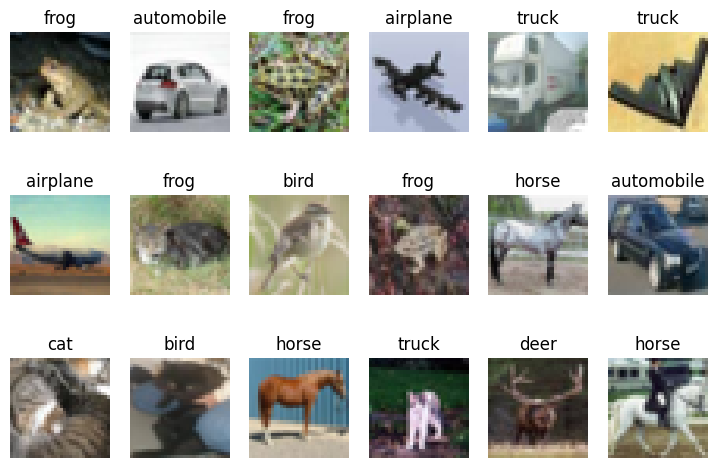

In [12]:
y_pred = np.argmax(model.predict(X_test_norm), axis=1)

cols, rows = 6, 3
fig = plt.figure(figsize=(1.5 * cols, 2 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_pred))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        ax.set_title(cifar10_classes[y_pred[random_index]])
plt.show()